In [ ]:
import pandas as pd
df=pd.read_csv('movie_review_cleaned.csv')
input_df= df.head(100)
print(input_df.head())
input_df

  reviews.title  ...                                      Lemmatization
0  Just Awesome  ...  love album good hip hop side current pop sound...
1          Good  ...             good flavor review collect part promot
2          Good  ...                                        good flavor
3  Disappointed  ...  read review look buy one coupl lubric ultim di...
4    Irritation  ...  husband bought gel u gel caus irrit felt like ...

[5 rows x 8 columns]


,reviews.title,reviews.text,Lower Case,Removal of Punctuation,Removal of Special Characters,Stopwords Removal,Stemmingg,Lemmatization
0,Just Awesome,i love this album. it's very good. more to the...,i love this album. it's very good. more to the...,i love this album its very good more to the hi...,i love this album its very good more to the hi...,love album good hip hop side current pop sound...,love album good hip hop side current pop sound...,love album good hip hop side current pop sound...
1,Good,Good flavor. This review was collected as part...,good flavor. this review was collected as part...,good flavor this review was collected as part ...,good flavor this review was collected as part ...,good flavor review collected part promotion,good flavor review collect part promot,good flavor review collect part promot
2,Good,Good flavor.,good flavor.,good flavor,good flavor,good flavor,good flavor,good flavor
3,Disappointed,I read through the reviews on here before look...,i read through the reviews on here before look...,i read through the reviews on here before look...,i read through the reviews on here before look...,read reviews looking buying one couples lubric...,read review look buy one coupl lubric ultim di...,read review look buy one coupl lubric ultim di...
4,Irritation,My husband bought this gel for us. The gel cau...,my husband bought this gel for us. the gel cau...,my husband bought this gel for us the gel caus...,my husband bought this gel for us the gel caus...,husband bought gel us gel caused irritation fe...,husband bought gel us gel caus irrit felt like...,husband bought gel u gel caus irrit felt like ...
...,...,...,...,...,...,...,...,...
95,hydrating but not too heavy,It hydrates my skin. It is not too thick and h...,it hydrates my skin. it is not too thick and h...,it hydrates my skin it is not too thick and he...,it hydrates my skin it is not too thick and he...,hydrates skin thick heavy put review collected...,hydrat skin thick heavi put review collect par...,hydrat skin thick heavi put review collect par...
96,Super!,This product goes on smooth and makes your ski...,this product goes on smooth and makes your ski...,this product goes on smooth and makes your ski...,this product goes on smooth and makes your ski...,product goes smooth makes skin feel great inst...,product goe smooth make skin feel great instan...,product goe smooth make skin feel great instan...
97,Regenerist,I have tried other products and the Regenerist...,i have tried other products and the regenerist...,i have tried other products and the regenerist...,i have tried other products and the regenerist...,tried products regenerist seems best review co...,tri product regenerist seem best review collec...,tri product regenerist seem best review collec...
98,really hydrats,Really like the feel of the product and smooth...,really like the feel of the product and smooth...,really like the feel of the product and smooth...,really like the feel of the product and smooth...,really like feel product smooths well review c...,realli like feel product smooth well review co...,realli like feel product smooth well review co...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(input_df['Lemmatization']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [ ]:
import sys
sys.path.insert(1,'/content/')

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
def LDA_MODEL(number_of_topics,tf,feature_names, no_top_words):
  number_of_topics = 10
  model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
  model.fit(tf)
  return display_topics(model,feature_names, no_top_words)
  pass

def display_topics(model, feature_names, no_top_words):
  topic_dict = {}
  for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
  return pd.DataFrame.from_dict(topic_dict)

In [ ]:
import time
# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
#import AlgorithmLDA as lda_ul
result = LDA_MODEL(10,tf,tf_feature_names,10)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")
result


0
1
2
3
4
5
6
7
8
9
Runtime of the program is 1.1071913242340088


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,product,0.1,product,0.1,product,0.1,skin,38.1,product,46.9,love,30.1,love,0.1,use,29.9,product,0.1,product,0.1
1,use,0.1,use,0.1,use,0.1,product,15.3,use,0.1,use,0.1,use,0.1,love,0.1,use,0.1,use,0.1
2,love,0.1,love,0.1,love,0.1,use,14.3,love,0.1,product,0.1,product,0.1,product,0.1,love,0.1,love,0.1
3,skin,0.1,skin,0.1,skin,0.1,love,0.1,skin,0.1,skin,0.1,skin,0.1,skin,0.1,skin,0.1,skin,0.1


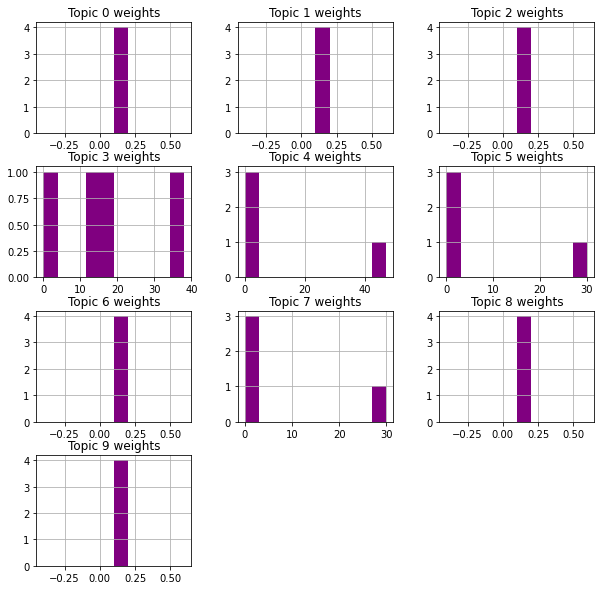

In [ ]:
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'Purple')
plt.show(block=False)

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


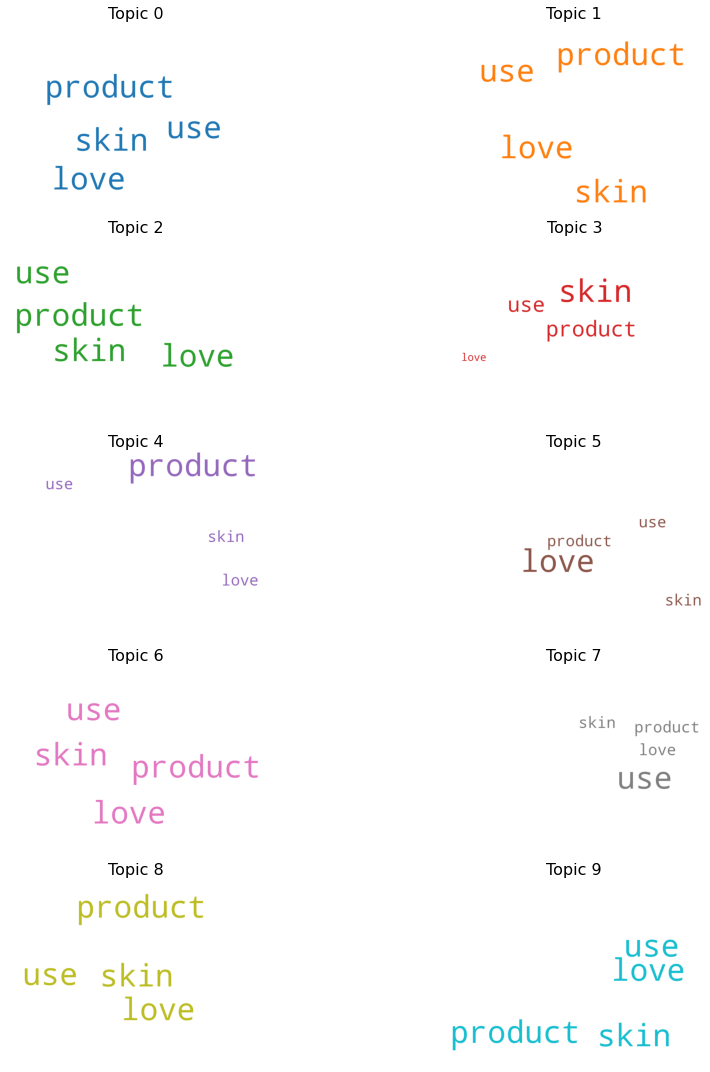

In [ ]:

# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.download('words')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


LSA TOPIC MODELLING



In [ ]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

def LSA_MODEL(tf,vectorizer):
  svd_model = TruncatedSVD(n_components=1, algorithm ='randomized', n_iter=100, random_state=122)
  svd_model.fit(tf)
  terms = vectorizer.get_feature_names()
  df = pd.DataFrame()
  for i, comp in enumerate(svd_model.components_):
    term_comp = zip(terms,comp)
    sorted_terms = sorted(term_comp, key = lambda x:x[1], reverse = True)[:7]
    str1 = "Topic "+str(i)
    str2 = str1 + " weights"
    str1_list = list()
    str2_list = list()
    for j in sorted_terms:
      str1_list.append(j[0])
      str2_list.append(j[1])
    df[str1] = str1_list
    df[str2] = str2_list
  return df

In [ ]:
import time
# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
#import AlgorithmLSA as lsa
lsa_result=LSA_MODEL(tf,vectorizer)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

lsa_result


0
1
2
3
4
5
6
7
8
9
Runtime of the program is 1.0144176483154297


,Topic 0,Topic 0 weights
0,product,0.745282
1,skin,0.456232
2,use,0.430631
3,love,0.225755


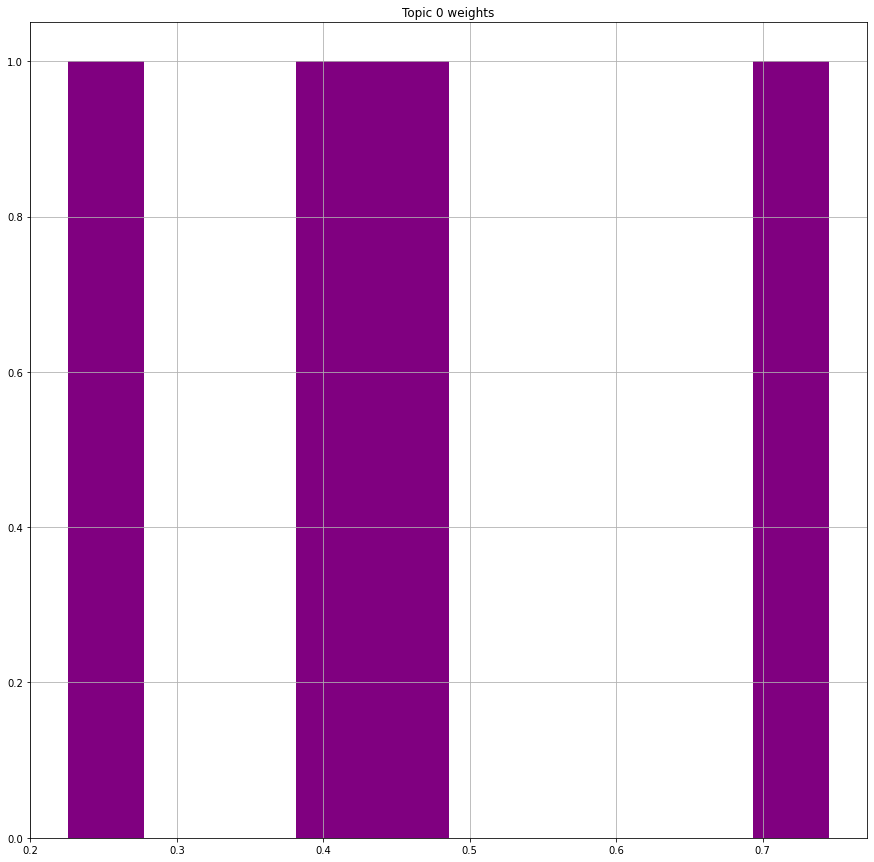

In [ ]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,1)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'purple')
plt.show(block=False)

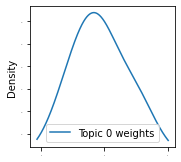

In [ ]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

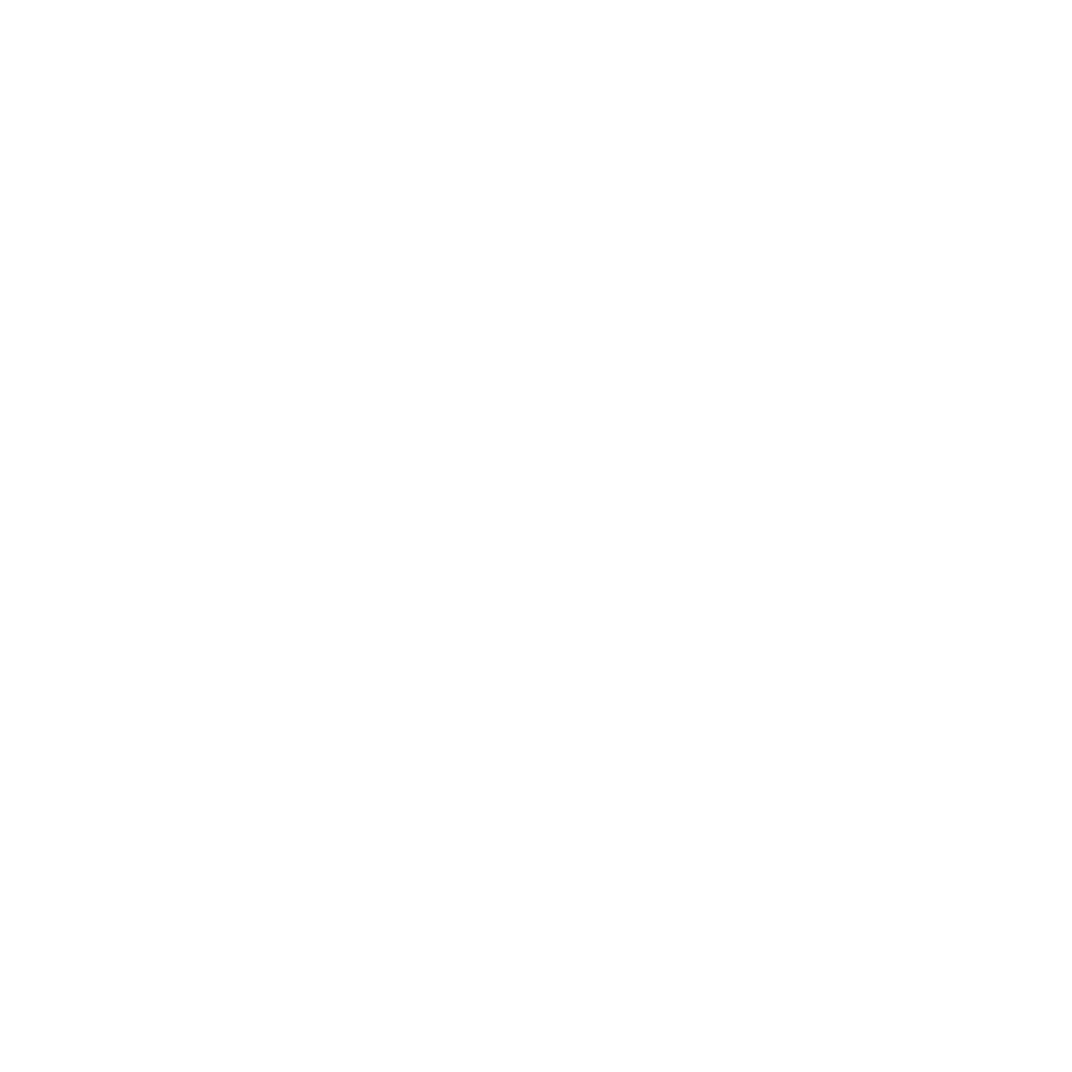

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,1)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,1)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(2,0, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

HMM LDA

In [ ]:
#import AlgorithmHMMLDA as HMMLDA
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
from __future__ import print_function
import time

from six.moves import xrange
import numpy as np
from scipy.special import gammaln

class BaseTopicModel(object):
    def __init__(self, n_doc, n_voca, **kwargs):
        self.n_doc = n_doc
        self.n_voca = n_voca
        self.verbose = kwargs.pop('verbose', True)

class BaseGibbsParamTopicModel(BaseTopicModel):


    def __init__(self, n_doc, n_voca, n_topic, alpha, beta, **kwargs):
        super(BaseGibbsParamTopicModel, self).__init__(n_doc=n_doc, n_voca=n_voca, **kwargs)
        self.n_topic = n_topic
        self.TW = np.zeros([self.n_topic, self.n_voca])
        self.DT = np.zeros([self.n_doc, self.n_topic])
        self.sum_T = np.zeros(self.n_topic)

        self.alpha = alpha
        self.beta = beta

        self.topic_assignment = list()

        self.TW += self.beta
        self.sum_T += self.beta * self.n_voca
        self.DT += self.alpha

class HMM_LDA(BaseGibbsParamTopicModel):

    def __init__(self, n_docs, n_voca, n_topic, n_class, alpha=0.1, beta=0.01, gamma=0.1, eta=0.1, **kwargs):
        super(HMM_LDA, self).__init__(n_docs, n_voca, n_topic, alpha, beta, **kwargs)
        self.n_class = n_class

        self.gamma = gamma
        self.eta = eta

        self.CW = np.zeros([self.n_class, self.n_voca]) + self.gamma  # class x word
        self.sum_C = np.zeros([self.n_class]) + self.n_voca * self.gamma

        self.T = np.zeros([self.n_class + 2, self.n_class + 2]) + self.eta

        self.word_class = list()
        self.word_topic = list()

    def fit(self, docs, max_iter=100):
        self.random_init(docs)
        self.gibbs_sampling(docs, max_iter)

    # randomly initialize 
    def random_init(self, docs):

        for di in xrange(self.n_doc):
            doc = docs[di]
            num_sentence = len(doc)

            doc_class = list()
            doc_topic = list()

            for si in xrange(num_sentence):
                sentence_class = list()
                sentence_topic = list()

                sentence = doc[si]
                len_sentence = len(sentence)

                for wi in xrange(len_sentence):
                    word = sentence[wi]
                    c = np.random.randint(self.n_class)

                    sentence_class.append(c)
                    self.CW[c, word] += 1
                    self.sum_C[c] += 1
                    if wi == 0:  # if the first word
                        self.T[self.n_class, c] += 1
                    else:
                        self.T[sentence_class[wi - 1], c] += 1

                    if wi == len_sentence - 1:  # the last word
                        self.T[c, self.n_class + 1] += 1

                    k = np.random.randint(self.n_topic)
                    sentence_topic.append(k)
                    self.DT[di, k] += 1
                    if c == 0:
                        self.TW[k, word] += 1
                        self.sum_T[k] += 1

                doc_class.append(sentence_class)
                doc_topic.append(sentence_topic)

            self.word_class.append(doc_class)
            self.word_topic.append(doc_topic)

    def gibbs_sampling(self, docs, max_iter):

        for iter in xrange(max_iter):
            tic = time.time()
            for di, doc in enumerate(docs):
                doc_topic = self.word_topic[di]
                doc_class = self.word_class[di]

                for si, sentence in enumerate(doc):
                    len_sentence = len(sentence)

                    sentence_topic = doc_topic[si]
                    sentence_class = doc_class[si]

                    for wi, word in enumerate(sentence):

                        if wi == 0:
                            prev_c = self.n_class
                        else:
                            prev_c = sentence_class[wi - 1]

                        if wi == len_sentence - 1:
                            next_c = self.n_class + 1
                        else:
                            next_c = sentence_class[wi + 1]

                        old_c = sentence_class[wi]
                        old_t = sentence_topic[wi]

                        # remove previous state
                        self.CW[old_c, word] -= 1
                        self.sum_C[old_c] -= 1
                        self.T[prev_c, old_c] -= 1
                        self.T[old_c, next_c] -= 1

                        # sample class
                        prob = (self.T[prev_c, :self.n_class] / self.T[prev_c].sum()) \
                                * (self.T[:self.n_class, next_c] / np.sum(self.T[:self.n_class], 1))
                        prob[0] *= (self.TW[old_t, word] / self.sum_T[old_t])
                        prob[1:] *= self.CW[1:, word] / self.sum_C[1:]

                        new_c = np.random.multinomial(1, prob).argmax()

                        sentence_class[wi] = new_c
                        self.CW[new_c, word] += 1
                        self.sum_C[new_c] += 1
                        self.T[prev_c, new_c] += 1
                        self.T[new_c, next_c] += 1

                        # remove previous topic state
                        self.DT[di, old_t] -= 1
                        if old_c == 0:
                            self.TW[old_t, word] -= 1
                            self.sum_T[old_t] -= 1

                        # sample topic
                        prob = self.DT[di].copy()
                        if new_c == 0:
                            prob *= self.TW[:, word] / self.sum_T
                        prob /= np.sum(prob)

                        new_topic = np.random.multinomial(1, prob).argmax()
                        self.DT[di, new_topic] += 1
                        if new_c == 0:
                            self.TW[new_topic, word] += 1
                            self.sum_T[new_topic] += 1
                        sentence_topic[wi] = new_topic

            if self.verbose:
                ll = self.log_likelihood()
                logger.info('[ITER] %d,\telapsed time: %.2f\tlog-likelihood:%.2f', iter, time.time() - tic, ll)

    def log_likelihood(self):

        ll = self.n_doc * gammaln(self.alpha * self.n_topic)
        ll -= self.n_doc * self.n_topic * gammaln(self.alpha)
        ll += self.n_topic * gammaln(self.beta * self.n_voca)
        ll -= self.n_topic * self.n_voca * gammaln(self.beta)

        for di in xrange(self.n_doc):
            ll += gammaln(self.DT[di]).sum() - gammaln(self.DT[di].sum())
        for ki in xrange(self.n_topic):
            ll += gammaln(self.TW[ki]).sum() - gammaln(self.sum_T[ki])

        if self.n_class != 1:
            ll += (self.n_class - 1) * gammaln(self.gamma * (self.n_class - 1))
            ll -= (self.n_class - 1) * self.n_voca * gammaln(self.gamma)
            ll += (self.n_class + 2) * gammaln(self.eta * (self.n_class + 2))
            ll -= (self.n_class + 2) * (self.n_class + 2) * gammaln(self.eta)

            for ci in xrange(1, self.n_class):
                ll += gammaln(self.CW[ci]).sum() - gammaln(self.sum_C[ci])
            for ci in xrange(self.n_class + 2):
                ll += gammaln(self.T[ci]).sum() - gammaln(self.T[ci].sum())

        return ll

In [ ]:
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

In [ ]:
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["Lemmatization"].values)

[[['love', 'album', 'good', 'hip', 'hop', 'side', 'current', 'pop', 'sound', 'hype', 'listen', 'everyday', 'gym', 'give', '5star', 'rate', 'way', 'metaphor', 'crazi'], ['good', 'flavor', 'review', 'collect', 'part', 'promot'], ['good', 'flavor'], ['read', 'review', 'look', 'buy', 'one', 'coupl', 'lubric', 'ultim', 'disappoint', 'didnt', 'even', 'live', 'review', 'read', 'starter', 'neither', 'boyfriend', 'could', 'notic', 'sort', 'enhanc', 'captiv', 'sensat', 'notic', 'howev', 'messi', 'consist', 'reminisc', 'liquidi', 'vaselin', 'difficult', 'clean', 'pleasant', 'especi', 'sinc', 'lack', 'captiv', 'sensat', 'expect', 'im', 'disappoint', 'paid', 'much', 'lube', 'wont', 'use', 'could', 'use', 'normal', 'person', 'lubric', '1', 'le', 'money', '2', 'le', 'mess'], ['husband', 'bought', 'gel', 'u', 'gel', 'caus', 'irrit', 'felt', 'like', 'burn', 'skin', 'wouldnt', 'recommend', 'gel'], ['boyfriend', 'bought', 'spice', 'thing', 'bedroom', 'highli', 'disappoint', 'product', 'bought', 'one', 'a

NameError: ignored

Supervised LDA TOPIC MODELLING

In [ ]:
!pip install pymc

     |████████████████████████████████| 389kB 21.4MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp37-cp37m-linux_x86_64.whl size=1352893 sha256=1a44178d16af06f6a81d4745194df2017e19ba91341b99669a32b946565a6558
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [ ]:
from __future__ import print_function

import numpy as np
from scipy.special import gammaln
from scipy.stats import norm
from numpy.linalg import solve
from six.moves import xrange

import numpy as np


import numpy as np

from six.moves import xrange


def sampling_from_dist(prob):
    """ Sample index from a list of unnormalised probability distribution
        same as np.random.multinomial(1, prob/np.sum(prob)).argmax()
    Parameters
    ----------
    prob: ndarray
        array of unnormalised probability distribution
    Returns
    -------
    new_topic: return a sampled index
    """
    thr = prob.sum() * np.random.rand()
    new_topic = 0
    tmp = prob[new_topic]
    while tmp < thr:
        new_topic += 1
        tmp += prob[new_topic]
    return new_topic


def sampling_from_dict(prob):
    """ sample key from dictionary `prob` where values are unnormalised probability distribution
    Parameters
    ----------
    prob: dict
        key = topic
        value = unnormalised probability of the topic
    Returns
    -------
    key: int
        sampled key
    """
    prob_sum = sum(prob.values())

    thr = prob_sum * np.random.rand()
    tmp = 0
    for key, p in prob.items():
        tmp += p
        if tmp < thr:
            new_topic = key
    return new_topic


def isfloat(value):
    """
    Check the value is convertable to float value
    """
    try:
        float(value)
        return True
    except ValueError:
        return False


def read_voca(path):
    """
    open file from path and read each line to return the word list
    """
    with open(path, 'r') as f:
        return [word.strip() for word in f.readlines()]


def word_cnt_to_bow_list(word_ids, word_cnt):
    corpus_list = list()
    for di in xrange(len(word_ids)):
        doc_list = list()
        for wi in xrange(len(word_ids[di])):
            word = word_ids[di][wi]
            for c in xrange(word_cnt[di][wi]):
                doc_list.append(word)
        corpus_list.append(doc_list)
    return corpus_list


def log_normalize(log_prob_vector):
    """
    returns a probability vector of log probability vector
    """
    max_v = log_prob_vector.max()
    log_prob_vector += max_v
    log_prob_vector = np.exp(log_prob_vector)
    log_prob_vector /= log_prob_vector.sum()
    return log_prob_vector


def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus


def write_top_words(topic_word_matrix, vocab, filepath, n_words=20, delimiter=',', newline='\n'):
    with open(filepath, 'w') as f:
        for ti in xrange(topic_word_matrix.shape[0]):
            top_words = vocab[topic_word_matrix[ti, :].argsort()[::-1][:n_words]]
            f.write('%d' % (ti))
            for word in top_words:
                f.write(delimiter + word)
            f.write(newline)


def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words


class BaseTopicModel(object):
    """
    Attributes
    ----------
    n_doc: int
        the number of total documents in the corpus
    n_voca: int
        the vocabulary size of the corpus
    verbose: boolean
        if True, print each iteration step while inference.
    """
    def __init__(self, n_doc, n_voca, **kwargs):
        self.n_doc = n_doc
        self.n_voca = n_voca
        self.verbose = kwargs.pop('verbose', True)


class BaseGibbsParamTopicModel(BaseTopicModel):
    """ Base class of parametric topic models with Gibbs sampling inference
    Attributes
    ----------
    n_topic: int
        a number of topics to be inferred through the Gibbs sampling
    TW: ndarray, shape (n_voca, n_topic)
        word-topic matrix, keeps the number of assigned word tokens for each word-topic pair
    DT: ndarray, shape (n_doc, n_topic)
        document-topic matrix, keeps the number of assigned word tokens for each document-topic pair
    sum_T: ndarray, shape (n_topic)
        number of word tokens assigned for each topic
    alpha: float
        symmetric parameter of Dirichlet prior for document-topic distribution
    beta: float
        symmetric parameter of Dirichlet prior for topic-word distribution
    """

    def __init__(self, n_doc, n_voca, n_topic, alpha, beta, **kwargs):
        super(BaseGibbsParamTopicModel, self).__init__(n_doc=n_doc, n_voca=n_voca, **kwargs)
        self.n_topic = n_topic
        self.TW = np.zeros([self.n_topic, self.n_voca])
        self.DT = np.zeros([self.n_doc, self.n_topic])
        self.sum_T = np.zeros(self.n_topic)

        self.alpha = alpha
        self.beta = beta

        self.topic_assignment = list()

        self.TW += self.beta
        self.sum_T += self.beta * self.n_voca
        self.DT += self.alpha

class SupervisedLDA(BaseGibbsParamTopicModel):
    """ Supervised LDA with Gaussian response variables
    Attributes
    ----------
    eta: ndarray, shape (n_topic)
        coefficient parameter of Gaussian distribution where the mean is np.dot(z_bar.T, eta)
    sigma: float
        variance parameter of Gaussian output variables
    """

    def __init__(self, n_doc, n_voca, n_topic, alpha=0.1, beta=0.01, sigma=1., **kwargs):
        super(SupervisedLDA, self).__init__(n_doc=n_doc, n_voca=n_voca, n_topic=n_topic, alpha=alpha, beta=beta,
                                                 **kwargs)
        self.eta = np.random.normal(scale=5, size=self.n_topic)
        self.sigma = sigma

    def random_init(self, docs):
        """
        Random initialization of topics
        Parameters
        ----------
        docs:
        """
        for di in xrange(len(docs)):
            doc = docs[di]
            topics = np.random.randint(self.n_topic, size=len(doc))
            self.topic_assignment.append(topics)

            for wi in xrange(len(doc)):
                topic = topics[wi]
                word = doc[wi]
                self.TW[topic, word] += 1
                self.sum_T[topic] += 1
                self.DT[di, topic] += 1

    def fit(self, docs, responses, max_iter=100):
        """ Stochastic Expectation Maximisation algorithm
        """
        self.random_init(docs)
        for iteration in xrange(max_iter):

            for di in xrange(len(docs)):
                doc = docs[di]
                for wi in xrange(len(doc)):
                    word = doc[wi]
                    old_topic = self.topic_assignment[di][wi]

                    self.TW[old_topic, word] -= 1
                    self.sum_T[old_topic] -= 1
                    self.DT[di, old_topic] -= 1

                    z_bar = np.zeros([self.n_topic, self.n_topic]) + self.DT[di, :] + np.identity(self.n_topic)
                    # this seems more straightforward than z_bar/z_bar.sum(1)
                    z_bar /= self.DT[di, :].sum() + 1

                    # update
                    prob = (self.TW[:, word]) / (self.sum_T) * (self.DT[di, :]) * np.exp(
                        np.negative((responses[di] - np.dot(z_bar, self.eta)) ** 2) / 2 / self.sigma)

                    new_topic = sampling_from_dist(prob)

                    self.topic_assignment[di][wi] = new_topic
                    self.TW[new_topic, word] += 1
                    self.sum_T[new_topic] += 1
                    self.DT[di, new_topic] += 1

            # estimate parameters
            z_bar = self.DT / self.DT.sum(1)[:, np.newaxis]  # DxK
            self.eta = solve(np.dot(z_bar.T, z_bar), np.dot(z_bar.T, responses))

            # compute mean absolute error
            mae = np.mean(np.abs(responses - np.dot(z_bar, self.eta)))
            #if self.verbose:
             #   logger.info('[ITER] %d,\tMAE:%.2f,\tlog_likelihood:%.2f', iteration, mae,
              #              self.log_likelihood(docs, responses))

    def sample_heldout_doc(self, max_iter, heldout_docs):
        h_doc_topics = list()
        h_doc_topic_sum = np.zeros([len(heldout_docs), self.n_topic]) + self.alpha

        # random init
        for di in xrange(len(heldout_docs)):
            doc = heldout_docs[di]
            topics = np.random.randint(self.n_topic, size=len(doc))
            h_doc_topics.append(topics)

            for wi in xrange(len(doc)):
                topic = topics[wi]
                h_doc_topic_sum[di, topic] += 1

        for iter in xrange(max_iter):
            for di in xrange(len(heldout_docs)):
                doc = heldout_docs[di]
                for wi in xrange(len(doc)):
                    word = doc[wi]
                    old_topic = h_doc_topics[di][wi]

                    h_doc_topic_sum[di, old_topic] -= 1

                    # update
                    prob = (self.TW[:, word] / self.sum_T) * (self.DT[di, :])

                    new_topic = sampling_from_dist(prob)

                    h_doc_topics[di][wi] = new_topic
                    h_doc_topic_sum[di, new_topic] += 1

        return h_doc_topic_sum

    def log_likelihood(self, docs, responses):
        """
        likelihood function
        """
        ll = 0

        ll += len(docs) * gammaln(self.alpha * self.n_topic)
        ll -= len(docs) * self.n_topic * gammaln(self.alpha)
        ll += self.n_topic * gammaln(self.beta * self.n_voca)
        ll -= self.n_topic * self.n_voca * gammaln(self.beta)

        for di in xrange(self.n_doc):
            ll += gammaln(self.DT[di, :]).sum() - gammaln(self.DT[di, :].sum())
            z_bar = self.DT[di] / np.sum(self.DT[di])
            mean = np.dot(z_bar, self.eta)
            ll += norm.logpdf(responses[di], mean, np.sqrt(self.sigma))
        for ki in xrange(self.n_topic):
            ll += gammaln(self.TW[ki, :]).sum() - gammaln(self.TW[ki, :].sum())

        return ll


In [ ]:
training_data = input_df['Lemmatization'].values


In [ ]:

import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter
nltk.download('words')

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

LookupError: ignored

In [ ]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [ ]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

NameError: ignored

Bi-Term 

In [ ]:
!pip install biterm

     |████████████████████████████████| 81kB 6.7MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp37-cp37m-linux_x86_64.whl size=195800 sha256=1b3565100a653dd503e15b33b78003d88d76629d7dc50e529c76a01c239b332b
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [ ]:
from biterm.utility import vec_to_biterms
from biterm.cbtm import oBTM
import numpy as np
def BITERM_MODEL(tf, vectorizer):
  vocab = np.array(vectorizer.get_feature_names())
  biterms = vec_to_biterms(tf)
  btm = oBTM(num_topics=20, V= vocab)
  topics = btm.fit_transform(biterms, iterations=1)
  return topics
  pass

In [ ]:
import time
# starting time
start = time.time()
for i in range(10):
    print(i)
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)
import sys
sys.path.insert(1,'/content/')
#import AlgorithmBITERM as btm_model
topics = BITERM_MODEL(tf,vectorizer)
# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")


0
1
2
3
4
5
6
7
8
9


100%|██████████| 1/1 [00:00<00:00, 112.66it/s]

Runtime of the program is 1.0374302864074707



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:

topics

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
texts= input_df['Lemmatization'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))

love album good hip hop side current pop sound hype listen everyday gym give 5star rate way metaphor crazi (topic: 0)
good flavor review collect part promot (topic: 0)
good flavor (topic: 0)
read review look buy one coupl lubric ultim disappoint didnt even live review read starter neither boyfriend could notic sort enhanc captiv sensat notic howev messi consist reminisc liquidi vaselin difficult clean pleasant especi sinc lack captiv sensat expect im disappoint paid much lube wont use could use normal person lubric 1 le money 2 le mess (topic: 0)
husband bought gel u gel caus irrit felt like burn skin wouldnt recommend gel (topic: 0)
boyfriend bought spice thing bedroom highli disappoint product bought one absolut love ky mine thought would similar affect absolut noth buy (topic: 0)
bought earlier today excit check base product descript expect someth like regular ky fan expect left littl disappoint (topic: 0)
bought product husband tri impress tingl warm left u sticki use ky product pa